In [37]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import arch.unitroot as at 
import statsmodels.api as sm
import statistics
from collections import defaultdict

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [3]:
start='2008-1-1'
end='2019-12-31'

In [4]:
list_of_etfs = ['ACC','ADANIPORTS','AMBUJACEM','ASIANPAINT','AXISBANK','BANKBARODA','BHEL','BPCL', 'BOSCHLTD','CIPLA', 'COALINDIA', 'DRREDDY',                     'GAIL','GRASIM','HCLTECH','HDFCBANK','HEROMOTOCO','HINDALCO','HINDUNILVR', 'HDFC','ITC', 'ICICIBANK', 'IDEA', 'INDUSINDBK','INFY',                  'KOTAKBANK','LT','LUPIN', 'MARUTI','NTPC', 'ONGC', 'POWERGRID','PNB','RELIANCE','SBIN','SUNPHARMA','TCS','TATAMOTORS', 'TATAPOWER',                 'TATASTEEL', 'TECHM', 'ULTRACEMCO', 'VEDL','WIPRO','YESBANK','ZEEL']
left = ['BHARTIARTL']
for etf in list_of_etfs:
    try:
        exec('{} = pd.DataFrame()'.format(etf))
        exec('{} = pdr.get_data_yahoo("{}"+".NS",start,end)'.format(etf,etf)) 
    except:
        print("Data not available for", etf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
ACC

,Open,High,Low,Close,Adj Close,Volume,deviation,abs_deviation
Date,,,,,,,,
2008-01-01,1035.000000,1038.699951,1011.599976,1028.349976,788.273376,199990,-202.184140,202.184140
2008-01-02,1030.000000,1037.000000,1010.000000,1023.049988,784.210693,406742,-207.484127,207.484127
2008-01-03,1016.400024,1018.500000,1000.000000,1006.950012,771.869324,464742,-223.584103,223.584103
2008-01-04,1019.400024,1019.400024,994.000000,999.650024,766.273682,878761,-230.884091,230.884091
2008-01-07,1000.000000,1010.000000,971.000000,1001.849976,767.960083,405377,-228.684140,228.684140
...,...,...,...,...,...,...,...,...
2019-12-23,1443.500000,1474.849976,1441.250000,1467.250000,1445.986694,557537,236.715885,236.715885
2019-12-24,1472.900024,1476.050049,1451.199951,1460.599976,1439.432983,372278,230.065860,230.065860
2019-12-26,1464.400024,1470.000000,1448.099976,1451.699951,1430.661987,324912,221.165836,221.165836


In [10]:
for i in list_of_etfs:
    exec('{}["deviation"] = {}["Close"] - {}["Close"].mean()'.format(i,i,i))
    exec('{}["abs_deviation"] = abs({}["deviation"])'.format(i,i))
    exec('{}["std_dev"] = statistics.stdev({}["Close"])'.format(i,i))

In [14]:
corr_dict = dict()
for i in list_of_etfs:
    for j in list_of_etfs:
        if(i==j):
            pass
        else:
            name = i+'_'+j
            exec('cov1 = {}.Close.cov({}.Close)'.format(i,j))
            exec('co_rel = cov1/({}["std_dev"][0] * {}["std_dev"][0])'.format(i,j))
            corr_dict.setdefault(i,{})[j] = co_rel*100

In [17]:
best = dict()
for i in range(len(list_of_etfs)):
  for j in range(len(list_of_etfs)):
      if(i>=j):
          pass
      else:
          stocks = [list_of_etfs[i],list_of_etfs[j]]
          value = corr_dict[stocks[0]][stocks[1]]
          if (value>=95.0):
            best.setdefault(stocks[0],{})[stocks[1]] = value
          else:
            pass

In [22]:
inverse = dict()
for i in range(len(list_of_etfs)):
  for j in range(len(list_of_etfs)):
      if(i>=j):
          pass
      else:
          stocks = [list_of_etfs[i],list_of_etfs[j]]
          value = corr_dict[stocks[0]][stocks[1]]
          if (value<=-75.0):
            inverse.setdefault(stocks[0],{})[stocks[1]] = value
          else:
            pass

In [23]:
inverse

{'ASIANPAINT': {'BHEL': -79.22200314716433},
 'BHEL': {'HCLTECH': -77.9758945683211,
  'HINDUNILVR': -76.83620936353257,
  'ITC': -83.49093800136642,
  'INDUSINDBK': -75.4320068717525,
  'TCS': -78.08411641364042,
  'ULTRACEMCO': -79.45835866962338},
 'COALINDIA': {'RELIANCE': -79.80179746109643}}

In [24]:
for i in list_of_etfs:
    exec('{}["Norm_Close"] = {}["Close"]/({}["Close"][0])'.format(i,i,i))

In [31]:
for i in list_of_etfs:
    for j in list_of_etfs:
        if(i==j):
            pass
        else:
            col_name = "diff_"+str(j)
            exec('{}["{}"] = {}["Norm_Close"] - {}["Norm_Close"]'.format(i,col_name,i,j))

In [38]:
norm_mean_dict = defaultdict(dict)
for i in list_of_etfs:
    for j in list_of_etfs:
        if (i==j):
            pass
        else:
            col_name = "diff_"+str(j)
            exec('norm_mean_dict[i][j] = {}[col_name].mean()'.format(i))

defaultdict(dict,
            {'ACC': {'ADANIPORTS': 0.3334542013236834,
              'AMBUJACEM': -0.016313779985476298,
              'ASIANPAINT': -4.586477267143884,
              'AXISBANK': -0.7080355372364782,
              'BANKBARODA': -0.2337869357566989,
              'BHEL': 0.7230670833309037,
              'BPCL': -1.3639935371213747,
              'BOSCHLTD': -1.2769912225061855,
              'CIPLA': -0.8638135263293781,
              'COALINDIA': 0.43763417924529124,
              'DRREDDY': -1.70435527735573,
              'GAIL': 0.04672694800107748,
              'GRASIM': 0.23276667472282767,
              'HCLTECH': -2.277667558851,
              'HDFCBANK': -1.5909852538353144,
              'HEROMOTOCO': -2.0641446485378636,
              'HINDALCO': 0.41486330814805095,
              'HINDUNILVR': -2.219059169799645,
              'HDFC': -0.5307638379466061,
              'ITC': -1.3923963909413144,
              'ICICIBANK': 0.17647999540433185,
           

In [41]:
for i in list_of_etfs:
    for j in list_of_etfs:
        if(i==j):
            pass
        else:
            col_name_stock = "diff_"+str(j)
            col_name = str(j) + "-mean"
            exec('{}["{}"] = {}[col_name_stock] - norm_mean_dict[i][j]'.format(i,col_name,i))

In [64]:
max_ACC = []
cols = [("diff_"+str(list_of_etfs[j])) for j in range(1,len(list_of_etfs))]
for i in cols:
    print(i , max(ACC[i]))
    for j in range(len(max_ACC):
                   

diff_ADANIPORTS 0.9732719736237869
diff_AMBUJACEM 0.22395682870440836
diff_ASIANPAINT 0.0
diff_AXISBANK 0.336363665182275
diff_BANKBARODA 0.604713054080856
diff_BHEL 1.544950120857855
diff_BPCL 0.23459069613956696
diff_BOSCHLTD 0.19569246801830986
diff_CIPLA 0.0
diff_COALINDIA nan
diff_DRREDDY 0.050385773170093295
diff_GAIL 0.63945894278322
diff_GRASIM 0.6551585770240793
diff_HCLTECH 0.29285802901957825
diff_HDFCBANK 0.06457928717426925
diff_HEROMOTOCO 0.0
diff_HINDALCO 1.01042821378694
diff_HINDUNILVR 0.006977019090201986
diff_HDFC 0.31442146017350714
diff_ITC 0.0
diff_ICICIBANK 0.6727887524037834
diff_IDEA 1.561512872563914
diff_INDUSINDBK 0.3270912048029306
diff_INFY 0.09393447995601045
diff_KOTAKBANK 0.5203384254328259
diff_LT 0.706814448671729
diff_LUPIN 0.04205389877669374
diff_MARUTI 0.1899553599169429
diff_NTPC 1.1389111878530893
diff_ONGC 1.0290503961153776
diff_POWERGRID 0.6487760549095307
diff_PNB 1.1329219063553744
diff_RELIANCE 1.1073381712677226
diff_SBIN 0.65771926751220

In [42]:
ACC

,Open,High,Low,Close,Adj Close,Volume,deviation,abs_deviation,std_dev,Norm_Close,...,TCS-mean,TATAMOTORS-mean,TATAPOWER-mean,TATASTEEL-mean,TECHM-mean,ULTRACEMCO-mean,VEDL-mean,WIPRO-mean,YESBANK-mean,ZEEL-mean
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,1035.000000,1038.699951,1011.599976,1028.349976,788.273376,199990,-202.184140,202.184140,335.936682,1.000000,...,2.487323,0.720937,-0.585180,-0.695860,0.157718,1.126374,-0.095892,0.320566,1.304024,0.654867
2008-01-02,1030.000000,1037.000000,1010.000000,1023.049988,784.210693,406742,-207.484127,207.484127,335.936682,0.994846,...,2.486486,0.674863,-0.589843,-0.702408,0.166430,1.120565,-0.097223,0.324421,1.270227,0.661138
2008-01-03,1016.400024,1018.500000,1000.000000,1006.950012,771.869324,464742,-223.584103,223.584103,335.936682,0.979190,...,2.507767,0.661760,-0.643654,-0.710127,0.143225,1.110705,-0.100204,0.338128,1.274118,0.644862
2008-01-04,1019.400024,1019.400024,994.000000,999.650024,766.273682,878761,-230.884091,230.884091,335.936682,0.972091,...,2.506213,0.667715,-0.668406,-0.722803,0.147140,1.113383,-0.104859,0.330159,1.269535,0.646566
2008-01-07,1000.000000,1010.000000,971.000000,1001.849976,767.960083,405377,-228.684140,228.684140,335.936682,0.974231,...,2.536422,0.664932,-0.653439,-0.714711,0.179594,1.104284,-0.089833,0.359818,1.258707,0.662292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1443.500000,1474.849976,1441.250000,1467.250000,1445.986694,557537,236.715885,236.715885,335.936682,1.426800,...,-4.550893,0.942658,0.467397,0.210611,-1.138706,-1.561230,0.567492,-0.439111,1.769918,0.139306
2019-12-24,1472.900024,1476.050049,1451.199951,1460.599976,1439.432983,372278,230.065860,230.065860,335.936682,1.420334,...,-4.496291,0.939956,0.458581,0.203188,-1.131485,-1.583270,0.559475,-0.431797,1.733454,0.116696
2019-12-26,1464.400024,1470.000000,1448.099976,1451.699951,1430.661987,324912,221.165836,221.165836,335.936682,1.411679,...,-4.453170,0.937462,0.456303,0.189016,-1.134349,-1.557049,0.537128,-0.423656,1.774151,0.107712


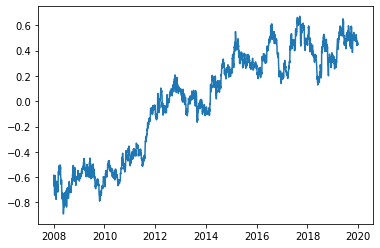

In [59]:
plt.plot(ACC.index,ACC['TATAPOWER-mean'])

In [ ]:
#Highest mean

In [ ]:
max(difference of means of pairs)

max(underroot(mean*std_dev))